<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/Snappfood---Sentiment-Analysis/blob/main/Snappfood_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load Data

In [252]:
import numpy
!pip install hazm

In [253]:
import pandas as pd
import numpy as np
import hazm
import nltk
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dropout, Flatten, Dense, MaxPool1D
import tensorflow as tf

In [254]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [255]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Snappfood - Sentiment Analysis/Snappfood - Sentiment Analysis.csv',
                         encoding='utf-8',
                         sep='\t+',
                         on_bad_lines='skip',
                         engine='python')
data.head(15)

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0
5,بدترین پیتزایی که تا به حال خورده بودم,SAD,1
6,از همه لحاظ عالی ممنونم,HAPPY,0
7,کیفیت غذا متوسط رو به پایین بود انگار داخل یه ...,SAD,1
8,همه اقلام تازه و به روز وخیلیییییی سریع بدستم ...,HAPPY,0
9,همه چی خوب ولی هات داگ دورش کلا سوخته بود و دا...,SAD,1


# Text Preprocessing

In [256]:
def text_cleaner(text):

    tokens = word_tokenize(text)

    stop_word = hazm.stopwords_list()
    punctuation = list(string.punctuation + '؟،؛')
    bad_tokens = stop_word + punctuation

    filter_sentence = []
    for token in tokens:
        if (not token.isdigit()) and (token not in bad_tokens) :
            filter_sentence.append(token)

    text = ' '.join(filter_sentence)

    return text


In [257]:
data['comment'] = data['comment'].apply(text_cleaner)
data.head()

,comment,label,label_id
0,واقعا حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1
1,قرار ساعته برسه نیم ساعت زودتر موقع رسید، ببین...,HAPPY,0
2,قیمت مدل اصلا کیفیتش سازگاری نداره، ظاهر فریبن...,SAD,1
3,عالللی درست اندازه کیفیت خوب، امیداورم کیفیتتو...,HAPPY,0
4,شیرینی وانیلی مدل,HAPPY,0


# EDA

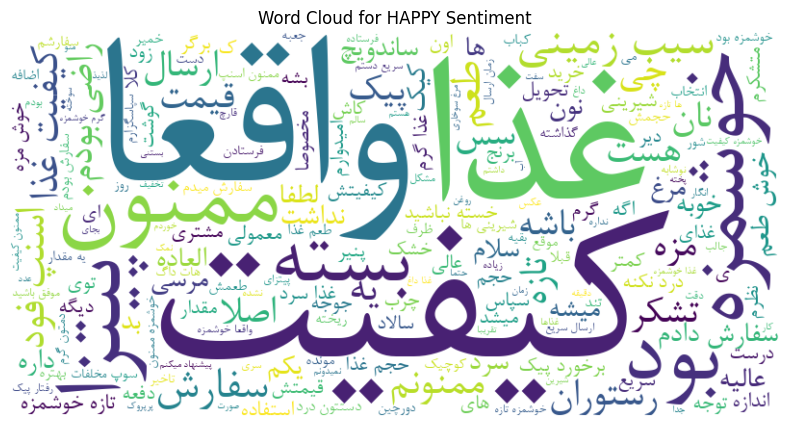

In [258]:
comment_words = ''
tokens = data['comment'][data['label_id'] == 0]
comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path = '/content/drive/MyDrive/Colab Notebooks/Snappfood - Sentiment Analysis/B-NAZANIN.TTF').generate(comment_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for HAPPY Sentiment')
plt.show()

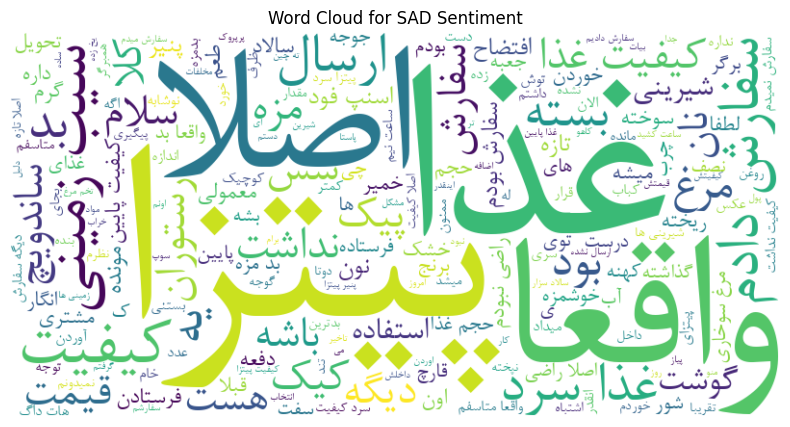

In [259]:
comment_words = ''
tokens = data['comment'][data['label_id'] == 1]
comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path = '/content/drive/MyDrive/Colab Notebooks/Snappfood - Sentiment Analysis/B-NAZANIN.TTF').generate(comment_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for SAD Sentiment')
plt.show()

# LogisticRegression

In [260]:
X = data['comment']
y = data['label_id']

In [261]:
vectorizer = TfidfVectorizer(min_df=2)
X = vectorizer.fit_transform(X)

In [262]:
X.shape

(70000, 13411)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [264]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (56000, 13411)
Test shape : (14000, 13411)


In [265]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# LogisticRegression evaluation

In [266]:
print(f'Test Score : {lr.score(X_test, y_test)}')
print(f'Train Score : {lr.score(X_train, y_train)}')

Test Score : 0.8237142857142857
Train Score : 0.8528392857142857


In [267]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test, target_names=['Happy', 'Sad']))

              precision    recall  f1-score   support

       Happy       0.80      0.84      0.82      6636
         Sad       0.85      0.81      0.83      7364

    accuracy                           0.82     14000
   macro avg       0.82      0.82      0.82     14000
weighted avg       0.83      0.82      0.82     14000



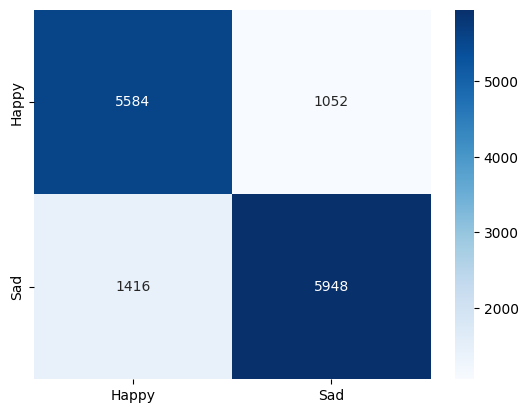

In [268]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Happy', 'Sad'],
    yticklabels=['Happy', 'Sad']
    )
plt.show()

# Embedding_CNN

In [269]:
tokenizer = Tokenizer()
tokens = tokenizer.fit_on_texts(data['comment'])

In [285]:
len(tokenizer.word_index) + 1

37785

In [271]:
encoded = tokenizer.texts_to_sequences(data['comment'])

In [272]:
len_list = []
for seq in encoded:
  len_list.append(len(seq))

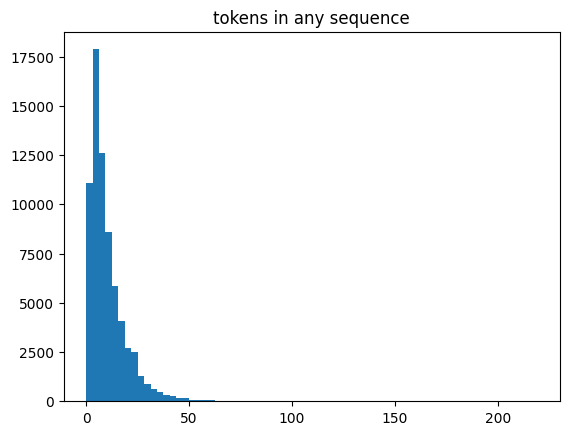

#####################################
mean of tokens 10.595528571428572
median of tokens 8.0


In [273]:
plt.hist(len_list, bins=70)
plt.title('tokens in any sequence')
plt.show()
print('#####################################')
print(f'mean of tokens {np.average(len_list)}')
print(f'median of tokens {np.median(len_list)}')

In [274]:
max_len = 45

In [275]:
X = pad_sequences(encoded, maxlen=max_len, padding='post')

In [276]:
X[1]

array([  227,  1051,   247,   114,    37,   283,    48,   232,  7139,
       16389,  1207, 16390,  2794,  8081,  2794,    21,  5107,   395,
         928,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [277]:
vocab_len = len(np.unique(X)) +1
vocab_len

37427

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [279]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (56000, 45)
Test shape : (14000, 45)


In [280]:
reg = tf.keras.regularizers.l2(0.002)

In [286]:
model = Sequential()
model.add(Embedding(input_dim=37785, output_dim=100, input_length=max_len, embeddings_regularizer=reg))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu', kernel_regularizer=reg))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [287]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 45, 100)           3778500   
                                                                 
 dropout_157 (Dropout)       (None, 45, 100)           0         
                                                                 
 conv1d_66 (Conv1D)          (None, 45, 64)            25664     
                                                                 
 max_pooling1d_66 (MaxPooli  (None, 22, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_47 (Flatten)        (None, 1408)              0         
                                                                 
 dropout_158 (Dropout)       (None, 1408)              0         
                                                     

In [288]:
opt = tf.optimizers.Adam(learning_rate = 0.001)
loss = tf.losses.BinaryCrossentropy()
metric = tf.metrics.BinaryAccuracy()
model.compile(optimizer=opt, loss=loss, metrics=metric)

In [289]:
model.fit(X_train, y_train, batch_size=100, epochs=13, validation_data = (X_test, y_test), verbose=2)

Epoch 1/13
560/560 - 46s - loss: 0.7115 - binary_accuracy: 0.7809 - val_loss: 0.5037 - val_binary_accuracy: 0.8169 - 46s/epoch - 82ms/step
Epoch 2/13
560/560 - 43s - loss: 0.5089 - binary_accuracy: 0.8168 - val_loss: 0.4915 - val_binary_accuracy: 0.8188 - 43s/epoch - 77ms/step
Epoch 3/13
560/560 - 44s - loss: 0.5065 - binary_accuracy: 0.8198 - val_loss: 0.5069 - val_binary_accuracy: 0.8098 - 44s/epoch - 78ms/step
Epoch 4/13
560/560 - 44s - loss: 0.5044 - binary_accuracy: 0.8210 - val_loss: 0.4847 - val_binary_accuracy: 0.8267 - 44s/epoch - 79ms/step
Epoch 5/13
560/560 - 43s - loss: 0.5009 - binary_accuracy: 0.8266 - val_loss: 0.4933 - val_binary_accuracy: 0.8226 - 43s/epoch - 78ms/step
Epoch 6/13
560/560 - 44s - loss: 0.4999 - binary_accuracy: 0.8278 - val_loss: 0.4859 - val_binary_accuracy: 0.8265 - 44s/epoch - 79ms/step
Epoch 7/13
560/560 - 44s - loss: 0.5019 - binary_accuracy: 0.8293 - val_loss: 0.4893 - val_binary_accuracy: 0.8281 - 44s/epoch - 78ms/step
Epoch 8/13
560/560 - 44s - 

# Embedding_CNN evaluation

In [290]:
print(f'Test Score : {model.evaluate(X_test, y_test)}')
print(f'Train Score : {model.evaluate(X_train, y_train)}')

438/438 [==============================] - 4s 9ms/step - loss: 0.4915 - binary_accuracy: 0.8281
Test Score : [0.49151918292045593, 0.8280714154243469]
1750/1750 [==============================] - 16s 9ms/step - loss: 0.4368 - binary_accuracy: 0.8658
Train Score : [0.43675342202186584, 0.8657500147819519]


In [291]:
y_prob = model.predict(X_test)
y_pred = np.round(y_prob)
print(classification_report(y_pred, y_test, target_names=['Happy', 'Sad']))

438/438 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

       Happy       0.79      0.86      0.82      6429
         Sad       0.87      0.80      0.83      7571

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000



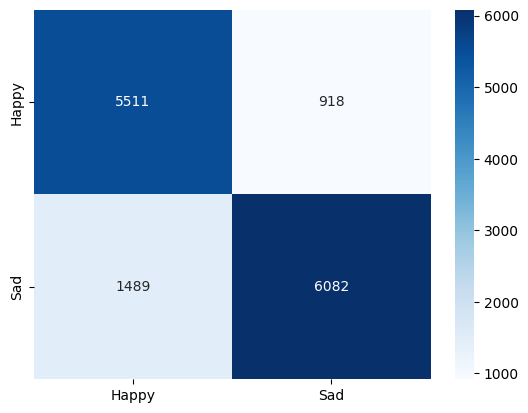

In [292]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Happy', 'Sad'],
    yticklabels=['Happy', 'Sad']
    )
plt.show()